In [1]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [3]:
# Read the dataset using read_csv function
df_all = pd.read_csv('../dataset/indian_unicorns.csv')
df_all = df_all.dropna(subset=['Company'])

In [4]:
# Convert the 'Entry' column values into datatime64[ns] format
df_all['Entry'] = pd.to_datetime(df_all['Entry'])

# Rename required column
df_all.rename(columns={'Entry':'Date_of_Entry'}, inplace=True)

# Sort the companies in ascending order of valuation
df_all.sort_values(['Valuation ($B)'], ascending=[0])
df_all.drop(['Unnamed: 0'], axis=1, inplace=True)

df_all.head()

,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Date_of_Entry,Location,Select Investors
0,OneCard,Fintech - Credit Cards,1.3,1.3,2022-07-01,Pune,"QED Investors, Matrix Partners India, Sequoia ..."
1,Leadsquared,SaaS - CRM,1.0,1.0,2022-06-01,Bangalore,"Stakeboat Capital, Gaja Capital, WestBridge"
2,Purplle,E-Commerce - Personal Care & Cosmetics,1.1,1.1,2022-06-01,Mumbai,"JSW Ventures, IvyCap Ventures, Blume Ventures,..."
3,PhysicsWallah,Edtech,1.1,1.1,2022-06-01,Noida,"GSV Ventures, WestBridge"
4,Open Financial Technologies,Fintech - Neo Bank,1.0,1.0,2022-05-01,Karnataka,"3ONE4 Capital, Tiger Global, Temasek, Speedinvest"


## Categorize companies into three categories
* **Graduated Unicorn:** A startup that has now become Publicly Listed (or) has been acquired by a Publicly Listed company.
* **Former Unicorn:** A startup that lost its Unicorn status due to a valuation degrading event.
* **Unicorn:** A unicorn company is any private company that is valued at $1-Billion or more and is Venture Capital funded.

In [5]:
# Categorize companies into categories
### Categories : (graduated, former, current)
def categorize_company(company_name):
    dict_cat = {
        'graduated' : '^',
        'former' : '*'
    }
    if(dict_cat['graduated'] in company_name):
        return str("Graduated")
    if(dict_cat['former'] in company_name):
        return str("Former")
    else:
        return str("Current")

Plot the distribution of companies in each category.

In [6]:
# Add a new column with the current valuation status of the companies
df_all['current_category'] = df_all['Company'].apply(lambda x : categorize_company(str(x)))

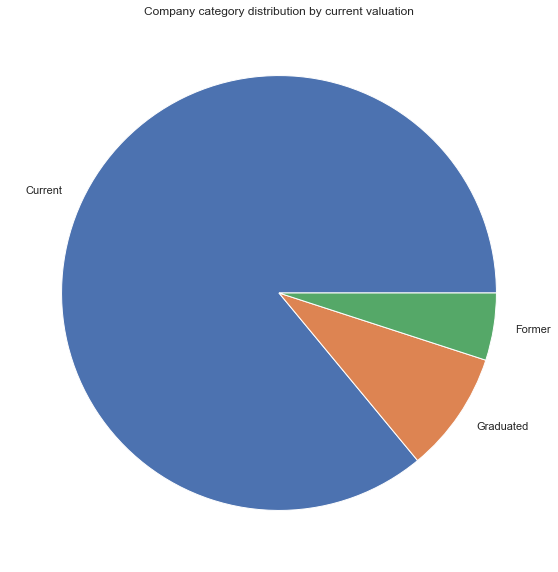

In [7]:
#Set color palette using seaborn
color_palette = sns.color_palette("deep")
sns.set(style='whitegrid')
# Draw pie chart using matplotlib (seaborn doesn't have inbuilt function for pie chart)
plt.subplots(figsize=(10,10))
plt.title('Company category distribution by current valuation')
plt.pie(df_all['current_category'].value_counts(), labels=df_all['current_category'].unique())
plt.show()

## Plot the spread of valuation of the current unicorns

In [8]:
# Get all the current unicorn companies
df_curr = df_all[df_all.current_category == "Current"]
df_curr = df_curr.sort_values(by=['Valuation ($B)'])

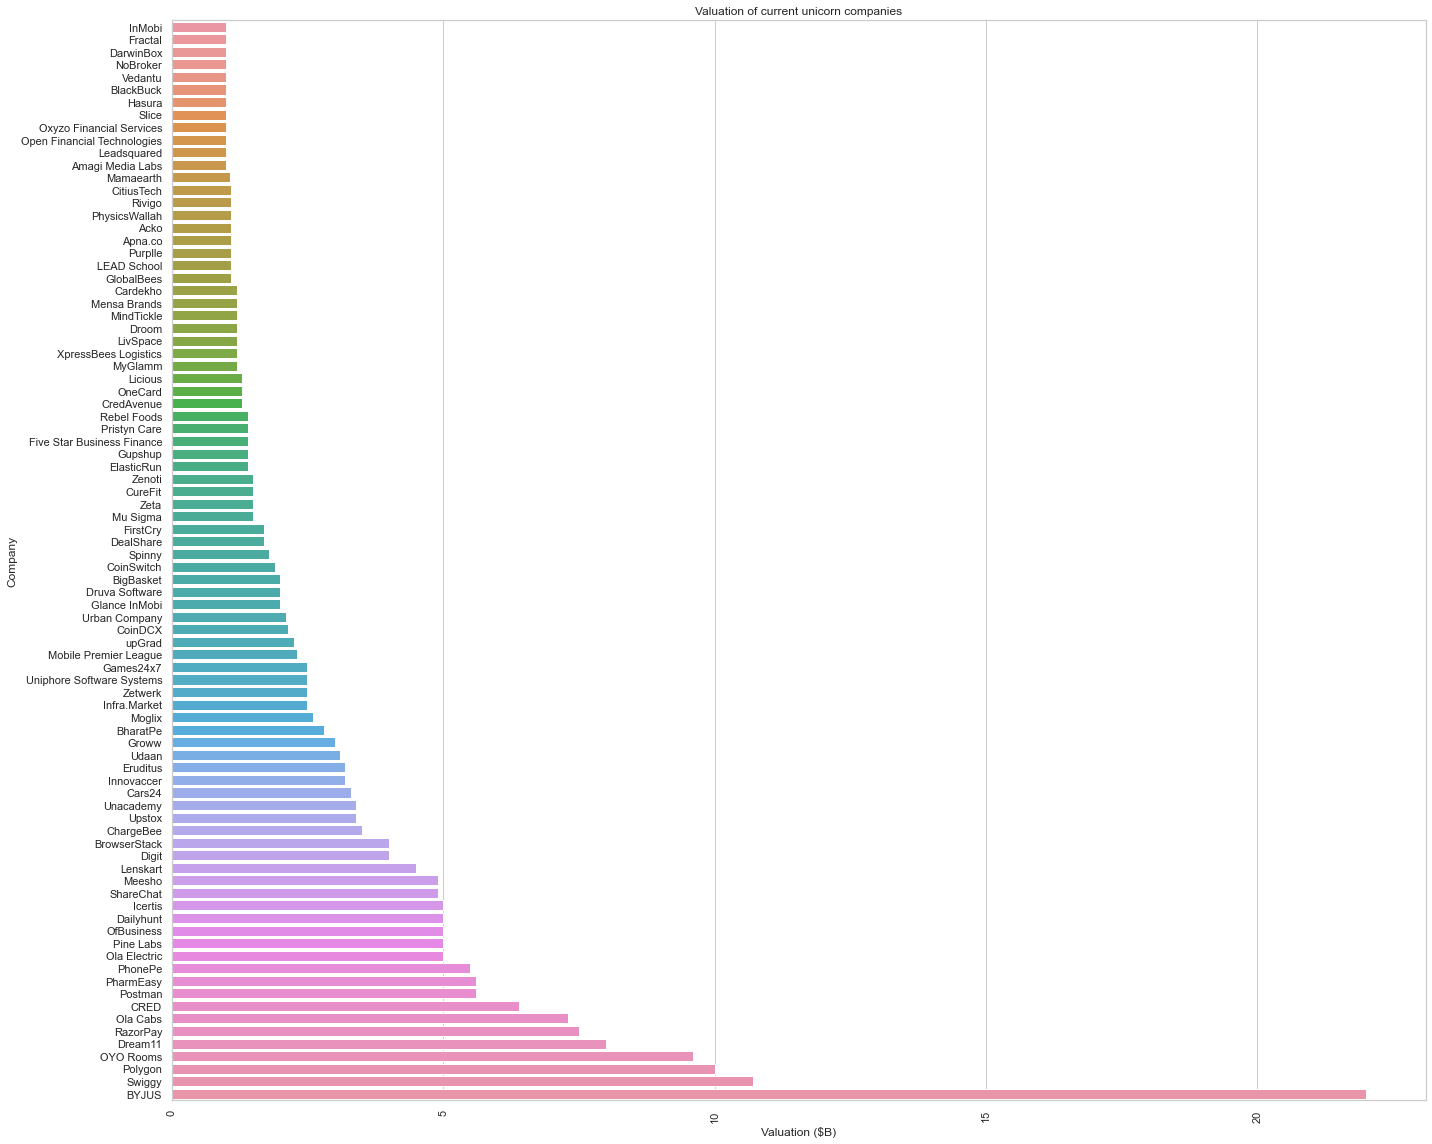

In [9]:
# Plot the graph for current valuation 

# Set a the figure size
plt.subplots(figsize=(20,16))

# Set the title
plt.title('Valuation of current unicorn companies')

# Plot the bar graph
sns.barplot(x=df_curr['Valuation ($B)'], y=df_curr['Company'])

# Rotate the labels 90 degrees
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Plot the distribution of companies according to Industry Sector

In [10]:
# Sort Companies into industries
df_curr['Industry'] = df_curr['Sector'].apply(lambda x: str(x).split(' - ')[0])

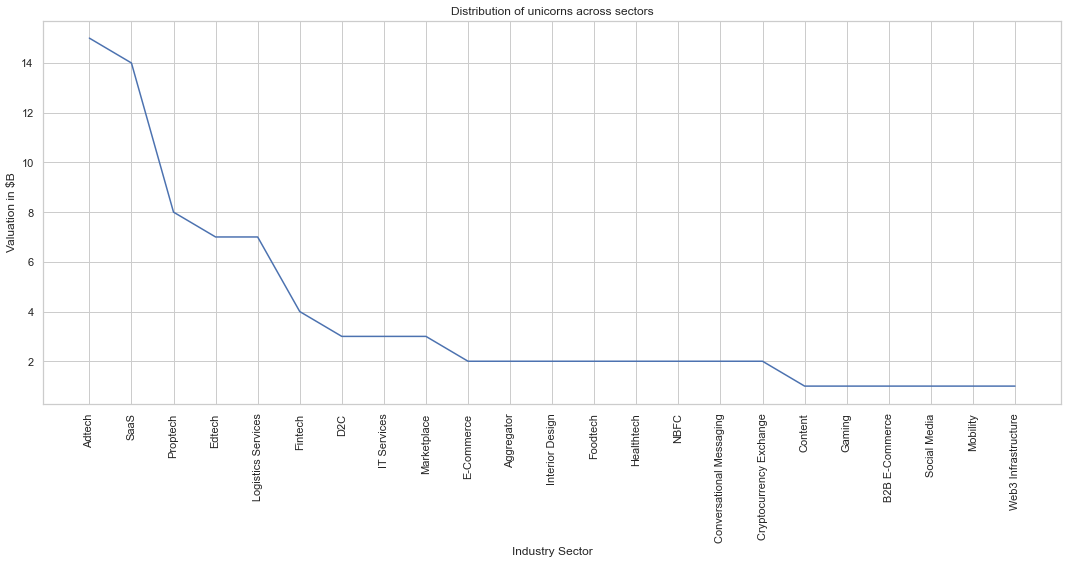

In [11]:
# Plot a stripplot using the industry sector data

# Set the figure size
plt.subplots(figsize=(15,8))

# Plot name
plt.title('Distribution of unicorns across sectors')

# Set white background
sns.set(style='white')

# Plot the graph
temp_ax = sns.lineplot(x=df_curr['Industry'].unique(), y=df_curr['Industry'].value_counts())

# Set labels
temp_ax.set(xlabel='Industry Sector', ylabel='Valuation in $B')

# Rotate the labels 90 degrees
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


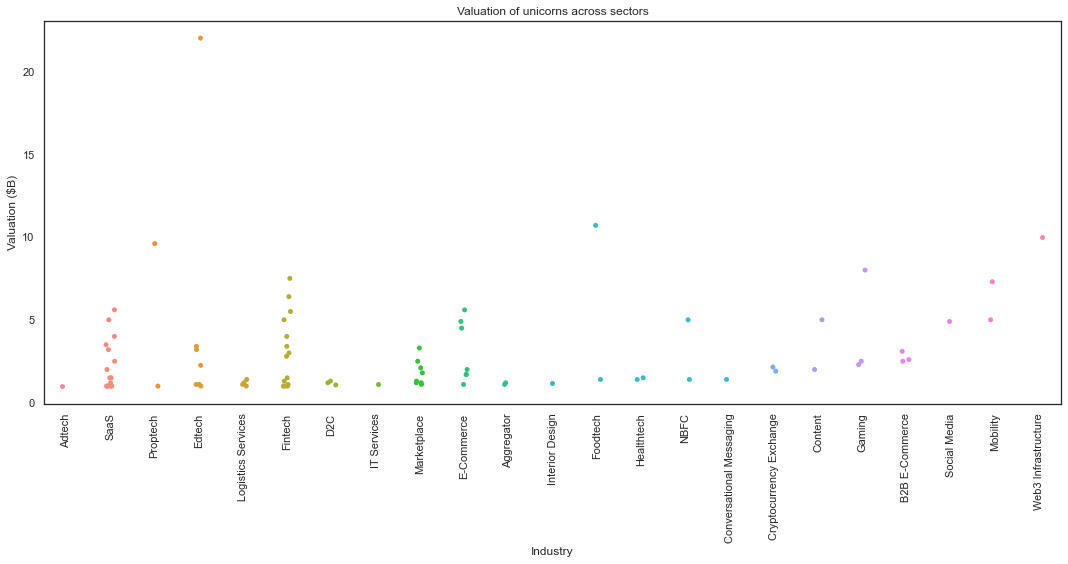

In [12]:
# Plot the valuation of companies by sector

# Set the figure size
plt.subplots(figsize=(15,8))

# Plot name
plt.title('Valuation of unicorns across sectors')

# Set white background
sns.set(style='white')

# Plot the graph
sns.stripplot(x=df_curr['Industry'], y=df_curr['Valuation ($B)'])

# Rotate the labels 90 degrees
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

#### CORRELATION: Visualize the corelation between Valuation, Location, Age and Sector

In [13]:
# Find the age of the companies in the unicorn club
df_curr['Age'] = df_curr['Date_of_Entry'].apply(lambda x: 2022 - int(str(x).split('-')[0]))

In [14]:
# Store the primary location of the company
df_curr['Primary_location'] = df_curr['Location'].apply(lambda x: str(x).split('/')[0])

Heatmap showing relationship between Valuation, Primary Location, Age in unicorn club and Industry sector

In [15]:
# Convert string type coloumns into category codes
df_curr['x_location'] = df_curr['Primary_location'].astype('category').cat.codes
df_curr['x_industry'] = df_curr['Industry'].astype('category').cat.codes

In [16]:
# List of columns to consider for corelation
temp_list_corr = ['Valuation ($B)', 'Age', 'x_location', 'x_industry']

Correlation method used : Spearman Correaltion

* *Two variables are monotonic correlated if any greater value of the one variable will result in a greater value of the other variable.*

In [17]:
# Compute the correlation
df_temp_corr = df_curr[temp_list_corr].corr(method='spearman', min_periods=1)
# Correct negative values since location and industry are strings converted to categorical codes
df_temp_corr = df_temp_corr.abs()
df_temp_corr

,Valuation ($B),Age,x_location,x_industry
Valuation ($B),1.000000,0.488577,0.047595,0.025199
Age,0.488577,1.000000,0.224352,0.106717
x_location,0.047595,0.224352,1.000000,0.053499
x_industry,0.025199,0.106717,0.053499,1.000000


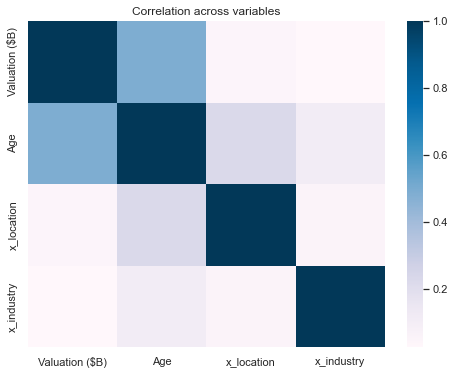

In [18]:
# Use a seaborn heatmap to show correlation

# Set the figure size
plt.subplots(figsize=(8,6))

# Plot name
plt.title('Correlation across variables')

# Plot the heatmap
temp_ax = sns.heatmap(df_temp_corr, cmap="PuBu")

#### Display all the startups that have entered the unicorn club this year

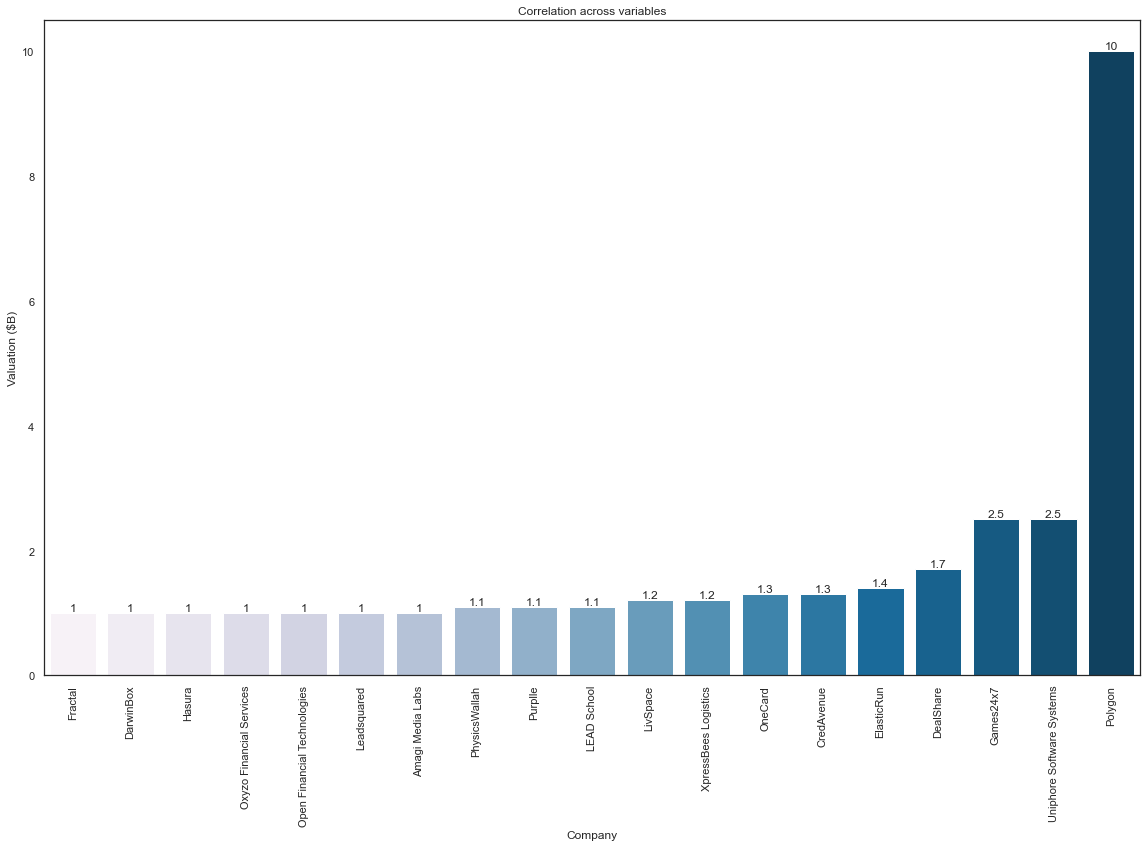

In [19]:
# Set the figure size
plt.subplots(figsize=(16,10))

# Plot name
plt.title('Correlation across variables')

# Rotate the labels 90 degrees
plt.xticks(rotation=90)
plt.tight_layout()

# Plot the bar graph of companies that entered the unicorn club this year.
temp_ax = sns.barplot(x=df_curr['Company'].loc[df_curr['Age'] == 0], y=df_curr['Valuation ($B)'].loc[df_curr['Age'] == 0], palette="PuBu")

# Display the numeric valuation on the chart
temp_bar_label = temp_ax.bar_label(temp_ax.containers[0])